## Logistic Regression

Logistic regression is a statistical method used for binary classification tasks, where the goal is to predict the probability of an observation belonging to one of two classes. Despite its name, logistic regression is primarily a classification algorithm rather than a regression algorithm.

In logistic regression, the probability that an observation 𝑥 belongs to a certain class (often denoted as 𝑦=1) is modeled using a logistic function, which ensures that the predicted probabilities lie between 0 and 1. The logistic function, also known as the sigmoid function.

Logistic regression is widely used in various fields, including finance, healthcare, marketing, and social sciences, due to its simplicity, interpretability, and effectiveness in modeling binary outcomes.

Logistic regression can be used for:
- Binary classification
- Multi-class classification
- One-vs-Rest classification

## Assumptions of Logistic Regression
1. The dependent variable must be categorical in nature.
2. The independent variables(features) must be independent.
3. There should be no outliers in the data. Check for outliers.
4. There should be no high correlations among independent variables. This can be checked using a correlation matrix.


In [43]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler

In [44]:
# data import 
df=sns.load_dataset('titanic')

In [45]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [46]:
# now is the time to encode the data
# preprocess the data
# 1. remove the deck column
df.drop('deck',axis=1)
# impute the missing values in age and fare
df['age'].fillna(df['age'].median(),inplace=True)
df['fare'].fillna(df['fare'].median(),inplace=True)
#impute the missing values in embark and embarked_town
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

# encode the categorical variables using the loop where object and category are used


for col in df.columns:
    if df[col].dtype=='object' or df[col].dtype.name=='category':
        df[col]=LabelEncoder().fit_transform(df[col])

C:\Users\MC\AppData\Local\Temp\ipykernel_16744\416261586.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)
C:\Users\MC\AppData\Local\Temp\ipykernel_16744\416261586.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [47]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,7,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,2,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,7,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,7,2,0,True


In [48]:

# X and y columns
X=df.drop('survived',axis=1)
y=df['survived']

In [49]:
# train test split the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# call the model
model=LogisticRegression()
# train the model
model.fit(X_train,y_train)

c:\Users\MC\miniconda3\envs\python_eda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
# predict the model
y_pred=model.predict(X_test)

In [51]:
# evaluate the model
print('accuracy_score:',accuracy_score(y_test,y_pred))
print('recall_score:',recall_score(y_test,y_pred))
print('precision_score:',precision_score(y_test,y_pred))
print('f1_score:',f1_score(y_test,y_pred))
print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))
print('classification Report:\n',classification_report(y_test,y_pred))

accuracy_score: 1.0
recall_score: 1.0
precision_score: 1.0
f1_score: 1.0
confusion_matrix:
 [[113   0]
 [  0  66]]
classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       113
           1       1.00      1.00      1.00        66

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Actual')

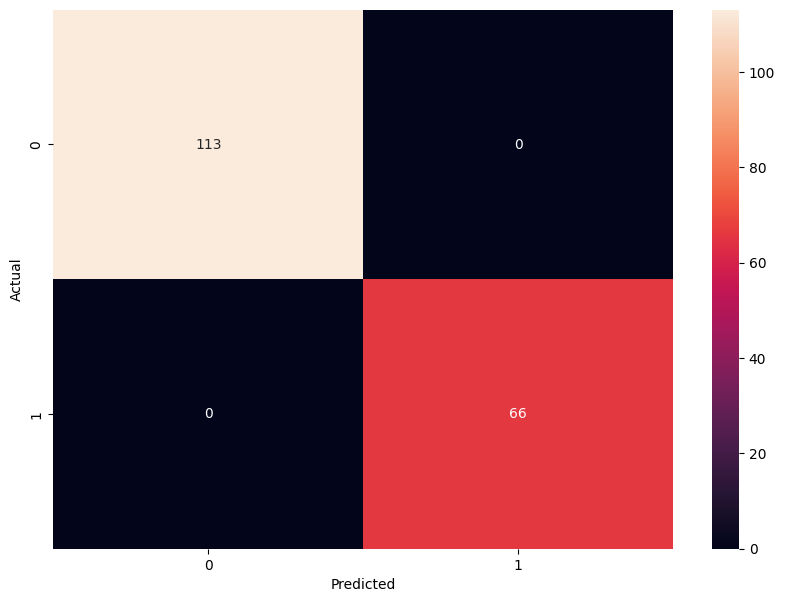

In [52]:
#plot the confusion matric
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')




In [55]:
# save the model
import pickle
pickle.dump(model,open('logistic_reg_model.pkl','wb'))